# Mathematical Transformer:
    1.Log transform
    2.Reciprocal 
    3.Power Transformer
    4.Box-Cox
    5.yeo-jhonson
    

![WhatsApp Image 2024-03-15 at 17.18.44_2053bbdb.jpg](<attachment:WhatsApp Image 2024-03-15 at 17.18.44_2053bbdb.jpg>)
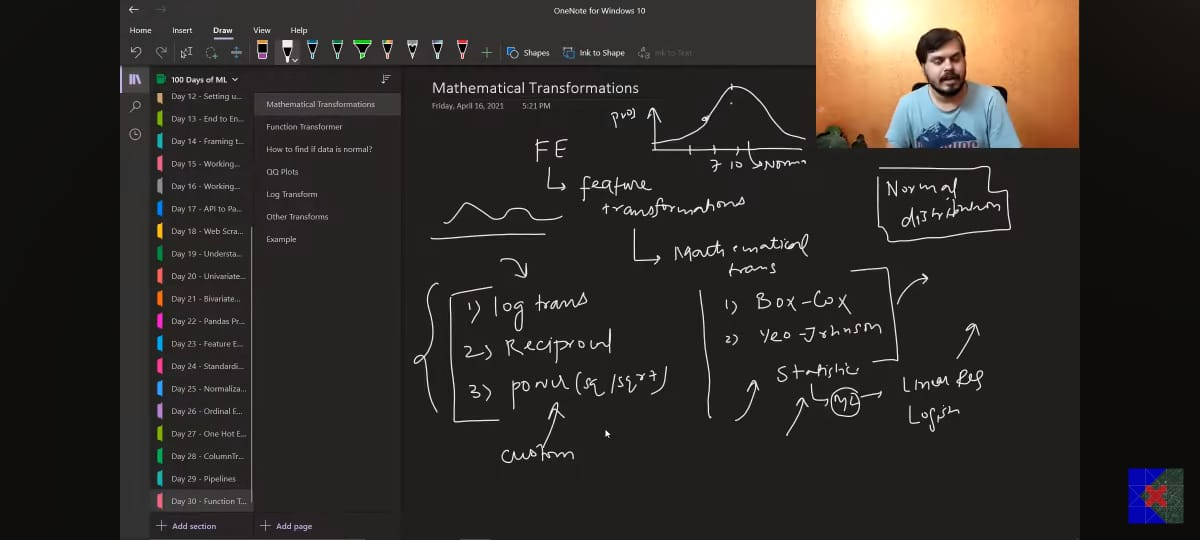

## SK learn:
    1.Fucntion transformer
    2.Power transformer
    3.Quantile transformer

# Function Transformer:
    1.log transform 
    2.Reciprocal 
    3.square/square root
    4.Custom

# Power Transformer:
    1.Box-Cox
    2. Yeo-jhonson

## How we find if data is normal?
    1.sns.distplot()
    2.Pd.skew()=0 then data is normally distributed
    3.QQ plot

# Log transform:
    ->for log transform take log of every value.
## When to use?
    -> does not apply on negative value.
    -> Right skew data comes center after apply log transform.

In [41]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

import scipy.stats as stats

In [42]:
df=pd.read_csv('D:/Machine_learning/csv_files/train.csv',usecols=['Age','Fare','Survived'])

In [43]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [44]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [45]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [46]:
x=df.drop(columns='Survived')
y=df['Survived']

In [47]:
x.head()

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [48]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

C:\Users\hp\AppData\Local\Temp\ipykernel_11796\3169290600.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Age'])


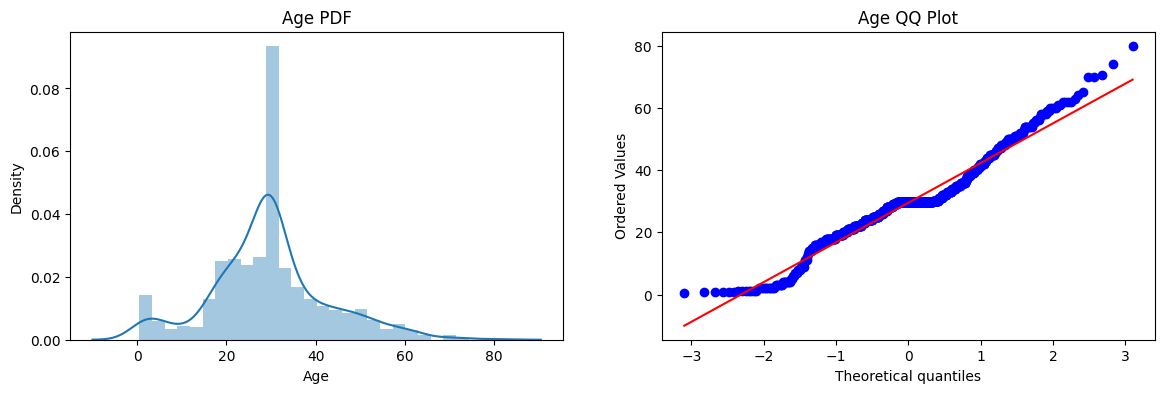

In [50]:
plt.figure(figsize=(14,4))

plt.subplot(121)
plt.title('Age PDF')
sns.distplot(x_train['Age'])

plt.subplot(122)
stats.probplot(x_train['Age'],dist='norm',plot=plt)
plt.title('Age QQ Plot')

plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_11796\4056503016.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Fare'])


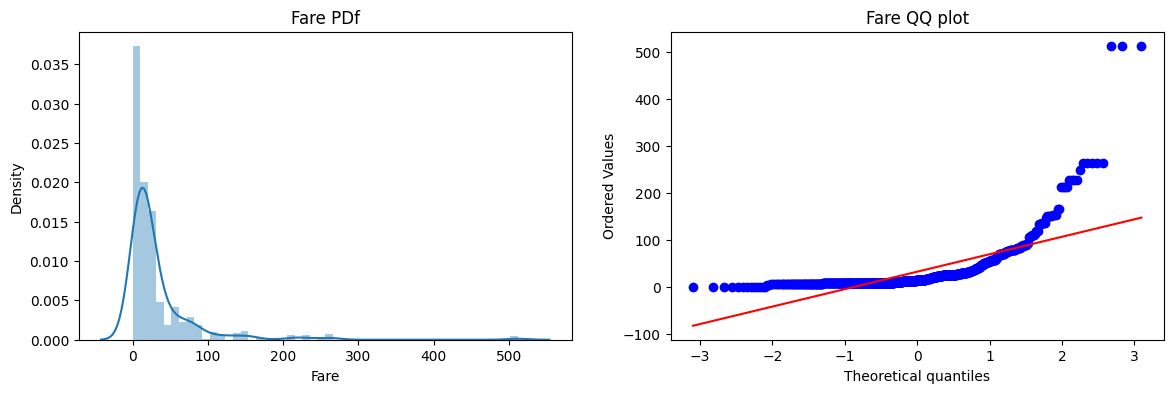

In [51]:
plt.figure(figsize=(14,4))

plt.subplot(121)
sns.distplot(x_train['Fare'])
plt.title('Fare PDf')

plt.subplot(122)
stats.probplot(x_train['Fare'],dist='norm',plot=plt)
plt.title('Fare QQ plot')

plt.show()

In [52]:
clf=LogisticRegression()
clf1=DecisionTreeClassifier()

In [53]:
# Without using transformer(Log tranform)
clf.fit(x_train,y_train)
clf1.fit(x_train,y_train)

y_pred=clf.predict(x_test)
y_pred1=clf1.predict(x_test)

print('accuracy LR',accuracy_score(y_pred,y_test))
print("accuracy DT",accuracy_score(y_pred1,y_test))

accuracy LR 0.6480446927374302
accuracy DT 0.664804469273743


In [54]:
# Using Log transform

trf=FunctionTransformer(func=np.log1p)

In [55]:
x_train_transform=trf.fit_transform(x_train)
x_test_tranform=trf.transform(x_test)

In [56]:
clf.fit(x_train_transform,y_train)
clf1.fit(x_train_transform,y_train)

y_pred2=clf.predict(x_test_tranform)
y_pred3=clf1.predict(x_test_tranform)

print('accuracy LR',accuracy_score(y_test,y_pred2))
print('accuracy DT',accuracy_score(y_test,y_pred3))

accuracy LR 0.6815642458100558
accuracy DT 0.6703910614525139


In [57]:
x_transformed=trf.fit_transform(x)

clf=LogisticRegression()
clf2=DecisionTreeClassifier()

print('LR',np.mean(cross_val_score(clf,x_transformed,y,scoring='accuracy',cv=10)))
print('DT',np.mean(cross_val_score(clf2,x_transformed,y,scoring='accuracy',cv=10)))

LR 0.678027465667915
DT 0.6543695380774033


Text(0.5, 1.0, 'Age After Log')

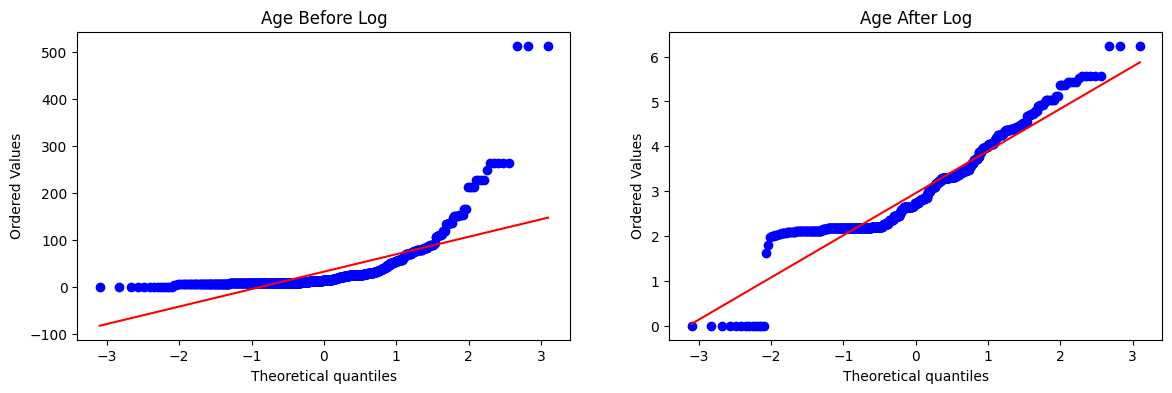

In [58]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(x_train['Fare'],dist='norm',plot=plt)
plt.title('Age Before Log')


plt.subplot(122)
stats.probplot(x_train_transform['Fare'],dist='norm',plot=plt)
plt.title('Age After Log')

Text(0.5, 1.0, 'Age After Log')

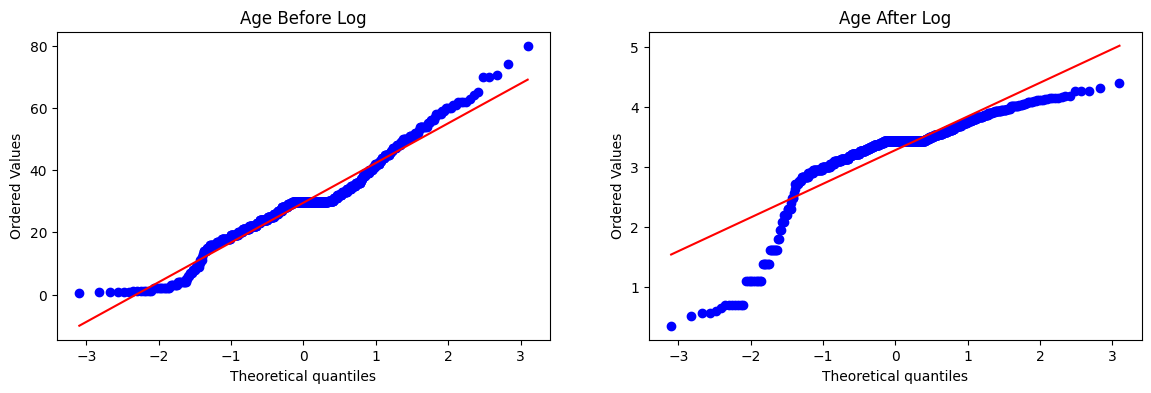

In [59]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(x_train['Age'],dist='norm',plot=plt)
plt.title('Age Before Log')


plt.subplot(122)
stats.probplot(x_train_transform['Age'],dist='norm',plot=plt)
plt.title('Age After Log')

In [60]:
trf2=ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')

x_train_transform2=trf2.fit_transform(x_train)
x_test_tranform2=trf2.transform(x_test)

In [63]:
clf=LogisticRegression()
clf2=DecisionTreeClassifier()

clf.fit(x_train_transform2,y_train)
clf2.fit(x_train_transform2,y_train)

y_pred=clf.predict(x_test_tranform2)
y_pred2=clf2.predict(x_test_tranform2)

print('Accuracy LR',accuracy_score(y_test,y_pred))
print('Accuracy DT',accuracy_score(y_test,y_pred2))


Accuracy LR 0.6703910614525139
Accuracy DT 0.664804469273743


In [64]:
def apply_transform(transform):
    x=df.iloc[:,1:3]
    y=df.iloc[:,0]
    trf=ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
    x_trans=trf.fit_transform(x)

    clf=LogisticRegression()

    print('Accuracy',np.mean(cross_val_score(clf,x_trans,y,scoring='accuracy',cv=10)))

    plt.figure(figsize=(14,4))
    plt.subplot(121)
    stats.probplot(x['Fare'],dist='norm',plot=plt)
    plt.title('Fare Before Transform')


    plt.subplot(122)
    stats.probplot(x_trans[:,0],dist='norm',plot=plt)
    plt.title('Fare After Transform')
    plt.show()

Accuracy 0.6589013732833957


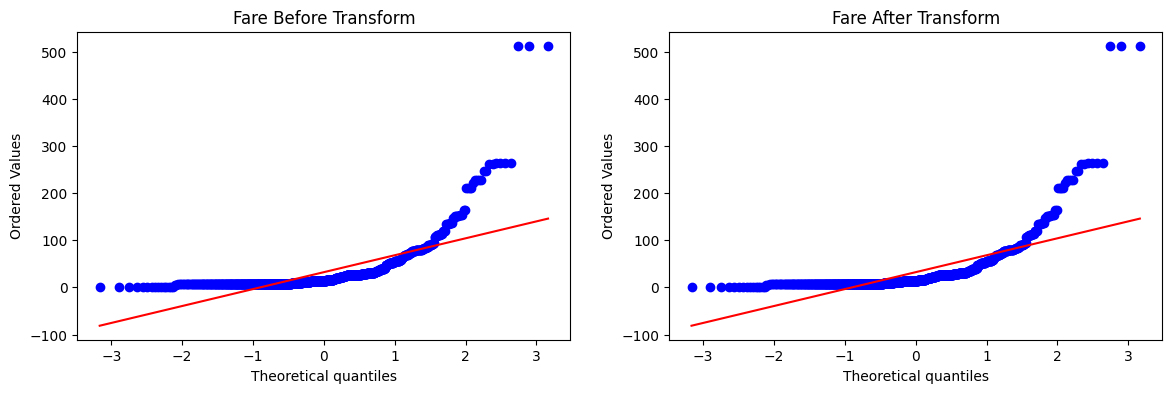

In [66]:
apply_transform(lambda x:x)

Accuracy 0.6442446941323345


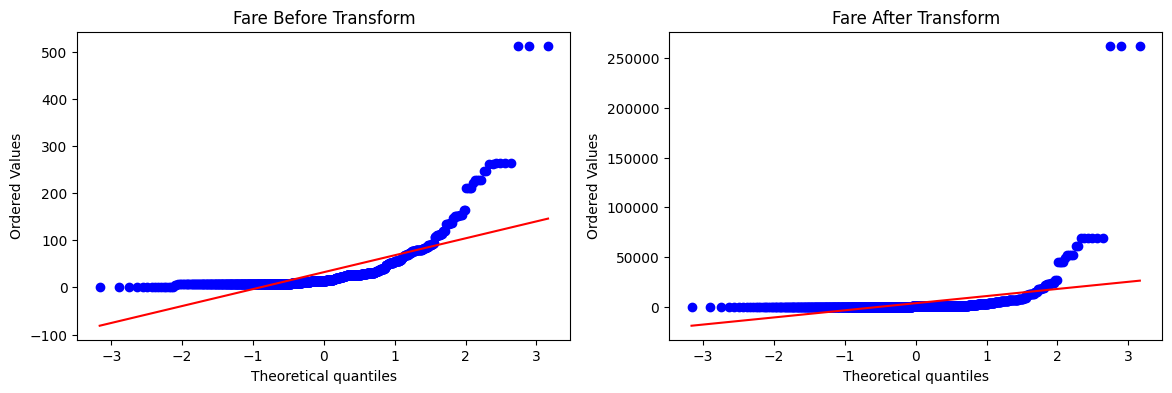

In [67]:
apply_transform(lambda x:x**2)

Accuracy 0.6589013732833957


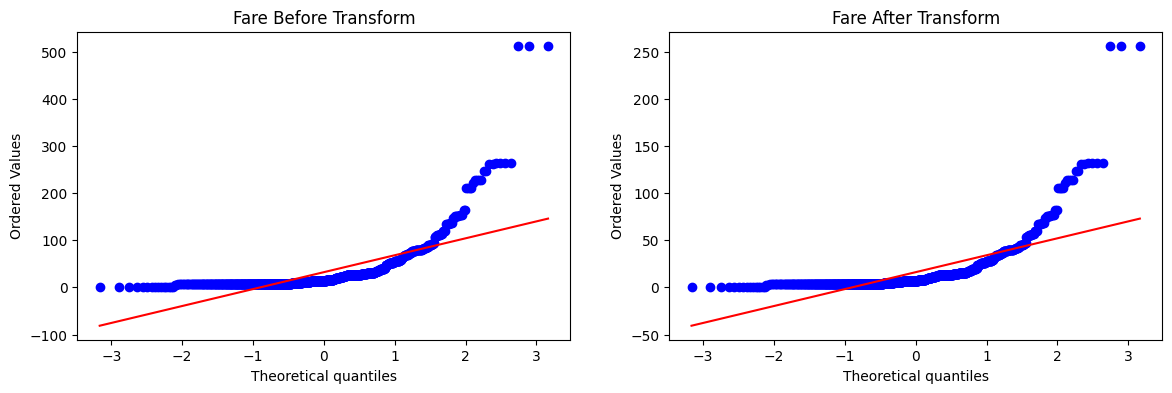

In [68]:
apply_transform(lambda x:x**1/2)

Accuracy 0.61729088639201


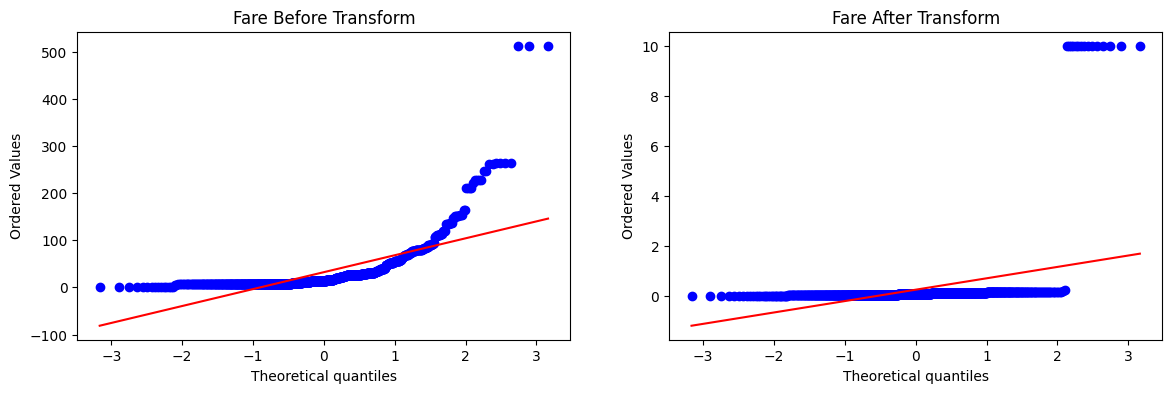

In [69]:
apply_transform(lambda x:1/(x+0.1))